In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
W_frames = [pd.read_csv('201412-citibike-tripdata.csv'), 
          pd.read_csv('201501-citibike-tripdata.csv'), 
          pd.read_csv('201502-citibike-tripdata.csv')]

df_W = pd.concat(W_frames, ignore_index=True)

S_frames = [pd.read_csv('201506-citibike-tripdata.csv'), 
          pd.read_csv('201507-citibike-tripdata.csv'), 
          pd.read_csv('201508-citibike-tripdata.csv')]

df_S = pd.concat(S_frames, ignore_index=True)


print df_W.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


# Lets first test for All the Riders

In [16]:
# frames = [ ]
df_All = pd.concat([df_W, df_S], ignore_index=True)

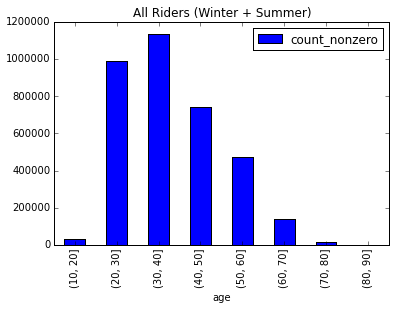

In [17]:
df_All['age'] = 2015-df_All['birth year'][(df_All['usertype'] == 'Subscriber')]
df_All['age'] = df_All['age'][~np.isnan(df_All['age'])]

bins = np.arange(10, 99, 10)
df_All.age.groupby(pd.cut(df_All.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All Riders (Winter + Summer)")
All_age_dist = df_All.age.groupby(pd.cut(df_All.age, bins)).agg([count_nonzero])



# I chose significane aplha as 0.05 or 5% for following Anderson Darling and Chisquare test 
# AD test for goodnes of fit

In [18]:
ad_All = scipy.stats.anderson(All_age_dist['count_nonzero'],'norm')
print "All riders on normal", ad_All

All riders on normal AndersonResult(statistic=0.49381167377011437, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [22]:
# Since we chosen alpha as 0.05
# our critical value is
print "All riders on normal AD test statistics :", ad_All[0]
print "it is greater less than critical value at 5% significange level :", ad_All[1][2]
print "Hence our All the riders distribution follows normal/gausion distribution. We fail to reject NULL hypothesis"

All riders on normal AD test statistics : 0.49381167377
it is greater less than critical value at 5% significange level : 0.709
Hence our All the riders distribution follows normal/gausion distribution. We fail to reject NULL hypothesis


# Shapi-Wilk Test

In [24]:
sh_All = scipy.stats.shapiro(All_age_dist['count_nonzero'], a=None, reta=False)
print "All riders on normal", sh_All

All riders on normal (0.8589597940444946, 0.11723995953798294)


In [25]:
# Since we chosen alpha as 0.05 - 5%
# our critical value is
print "All riders on normal Shapiro test statistics' p value is: ", sh_All[1]*100,"%"
print " P value is greater than 5%"
print "Hence our all riders distribution follows normal/gausion distribution. We fail to reject NULL hypothesis"

All riders on normal Shapiro test statistics' p value is:  11.7239959538 %
 P value is greater than 5%
Hence our all riders distribution follows normal/gausion distribution. We fail to reject NULL hypothesis


# KS test

In [26]:
#compare to normal

ksAll=scipy.stats.kstest(All_age_dist, 'norm')
print "All, normal fit", ksAll

#compare to poisson 

ksAll=scipy.stats.kstest(All_age_dist, 'cauchy')
print "All, normal fit", ksAll

All, normal fit KstestResult(statistic=1.0, pvalue=0.0)
All, normal fit KstestResult(statistic=0.9999997198790086, pvalue=0.0)


# Since KS test is so sensitive it doesn't give the results we want. 
# We reject the NULL hypothesis that two samples are same since we have low pvalue and high ks stat

# Now lets do it seperatelly for winter and summer riders

In [27]:
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_W['age'] = df_W['age'][~np.isnan(df_W['age'])]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]
df_S['age'] = df_W['age'][~np.isnan(df_S['age'])]

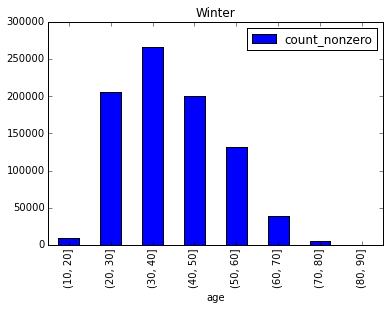

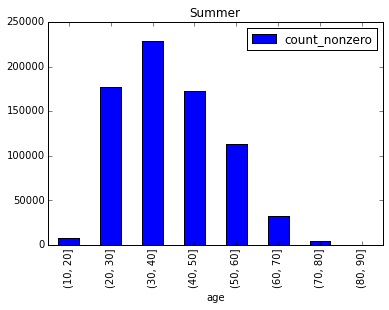

In [28]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

# I chose significane aplha as 0.05 or 5% for following Anderson Darling and Chisquare test

# AD test for goodnes of fit

In [29]:
ad_W = scipy.stats.anderson(W_age_dist['count_nonzero'],'norm')
print "Winter riders on normal", ad_W
ad_S = scipy.stats.anderson(S_age_dist['count_nonzero'], dist='norm')
print "Sumer riders on normal", ad_S

Winter riders on normal AndersonResult(statistic=0.51257652802639697, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Sumer riders on normal AndersonResult(statistic=0.51371224410583061, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [32]:
# Since we chosen alpha as 0.05
# our critical value is
print "Winter riders on normal AD test statistics :", ad_W[0]
print "it is less than critical value at 5% significange level :", ad_W[1][2]
print "Hence our winter ridership distribution follows normal/gausion distribution. We fail to reject NULL hypothesis"

print "--------------------------------------------"

print "Summer riders on normal AD test statistics :", ad_S[0]
print "it is less than critical value at 5% significange level :", ad_S[1][2]
print "Hence our Summer ridership distribution follows normal/gausion distribution. We fail to reject NULL hypothesis"


Winter riders on normal AD test statistics : 0.512576528026
it is less than critical value at 5% significange level : 0.709
Hence our winter ridership distribution follows normal/gausion distribution. We fail to reject NULL hypothesis
--------------------------------------------
Summer riders on normal AD test statistics : 0.513712244106
it is less than critical value at 5% significange level : 0.709
Hence our Summer ridership distribution follows normal/gausion distribution. We fail to reject NULL hypothesis


# Shapiro-Wilk test

In [33]:
sh_W = scipy.stats.shapiro(W_age_dist['count_nonzero'], a=None, reta=False)
sh_S = scipy.stats.shapiro(S_age_dist['count_nonzero'], a=None, reta=False)

print "Winter riders on normal", sh_W
print "Sumer riders on normal", sh_S

Winter riders on normal (0.8605096936225891, 0.12148702889680862)
Sumer riders on normal (0.8601701855659485, 0.12054465711116791)


In [34]:
# Since we chosen alpha as 0.05 - 5%
# our critical value is
print "WInter riders on normal Shapiro test statistics' p value is: ", sh_W[1]*100,"%"
print " P value is greater than 5%"
print "Hence our winter ridership distribution follows normal/gausion distribution. We fail to reject NULL hypothesis"

print "--------------------------------------------"

print "Sumer riders on normal Shapiro test statistics' p value is: ", sh_S[1]*100,"%"
print " P value is greater than 5%"
print "Hence our Sumer ridership distribution follows normal/gausion distribution. We fail to reject NULL hypothesis"

WInter riders on normal Shapiro test statistics' p value is:  12.1487028897 %
 P value is greater than 5%
Hence our winter ridership distribution follows normal/gausion distribution. We fail to reject NULL hypothesis
--------------------------------------------
Sumer riders on normal Shapiro test statistics' p value is:  12.0544657111 %
 P value is greater than 5%
Hence our Sumer ridership distribution follows normal/gausion distribution. We fail to reject NULL hypothesis


# In both cases and both summer and winter we failed to reject NULL hypothesis of Anderson, Shapiro test. So winter and summer riders age distribution follows gaussion distribution according to the test.

# KS Test


In [35]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)
winter, normal fit KstestResult(statistic=0.99999880158020016, pvalue=0.0)
summer, normal fit KstestResult(statistic=0.99999860603164392, pvalue=0.0)


In [36]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)


In [37]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [38]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=279727525.0, pvalue=nan)
summer, normal fit KstestResult(statistic=325371025.0, pvalue=nan)


# Since KS test is so sensitive it doesn't give the results we want. 
# We reject the NULL hypothesis that two samples are same since we have low pvalue and high ks stat

# I did not see any significant difference between winter and summer riders according to my tests.